In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
!pip install highlight_text
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np

from PIL import Image
import urllib
import json
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df=pd.read_excel('/content/df_mv.xlsx')
df.head()

,Week,Injuries,Home,xG,xG Away,Away,xG diff
0,1,3,Liverpool,2.7,0.3,Leeds United,2.4
1,2,3,Chelsea,0.9,2.1,Liverpool,-1.2
2,3,4,Liverpool,2.7,1.3,Arsenal,1.4
3,4,6,Aston Villa,2.7,1.8,Liverpool,0.9
4,5,3,Everton,1.2,2.6,Liverpool,-1.4


In [3]:
df.corr()

,Week,Injuries,xG,xG Away,xG diff
Week,1.000000,-0.133006,0.121196,-0.074155,0.115127
Injuries,-0.133006,1.000000,-0.008097,0.034285,-0.023505
xG,0.121196,-0.008097,1.000000,-0.485907,0.882019
xG Away,-0.074155,0.034285,-0.485907,1.000000,-0.840425
xG diff,0.115127,-0.023505,0.882019,-0.840425,1.000000


In [4]:
def get_xG_rolling_data(window=10, data=df):
    '''
    This function returns xG rolling average figures for a specific team.
    '''
    df['rolling_xG_for'] = df['xG'].rolling(window=window, min_periods=0).mean()
    df['rolling_xG_ag'] = df['xG Away'].rolling(window=window, min_periods=0).mean()
    df['rolling_diff'] = df['xG diff'].rolling(window=window, min_periods=0).mean()
    df['rolling_Injuries'] = df['Injuries'].rolling(window=window, min_periods=0).mean()

    return df

In [5]:
df = get_xG_rolling_data(window=10, data=df)
df = df.set_index('Week')
df.head()

,Injuries,Home,xG,xG Away,Away,xG diff,rolling_xG_for,rolling_xG_ag,rolling_diff,rolling_Injuries
Week,,,,,,,,,,
1,3,Liverpool,2.7,0.3,Leeds United,2.4,2.70,0.300000,2.400000,3.000000
2,3,Chelsea,0.9,2.1,Liverpool,-1.2,1.80,1.200000,0.600000,3.000000
3,4,Liverpool,2.7,1.3,Arsenal,1.4,2.10,1.233333,0.866667,3.333333
4,6,Aston Villa,2.7,1.8,Liverpool,0.9,2.25,1.375000,0.875000,4.000000
5,3,Everton,1.2,2.6,Liverpool,-1.4,2.04,1.620000,0.420000,3.800000


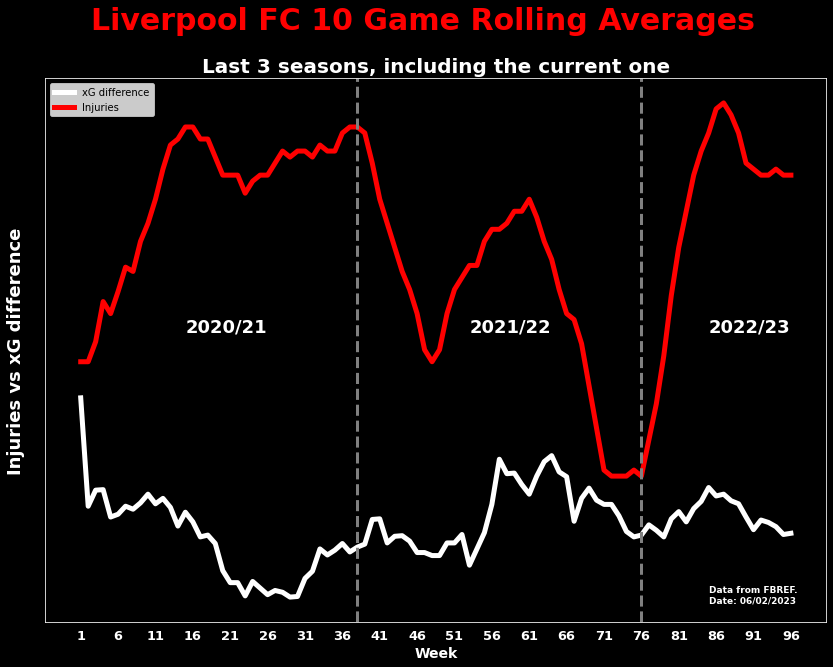

In [6]:
import numpy as np
import matplotlib.image as mpimg



plt.figure(figsize=(14,10)).set_facecolor('black')
plt.suptitle('Liverpool FC 10 Game Rolling Averages',fontfamily='Verdana',fontsize=30,fontweight='bold',color='red')
plt.title('Last 3 seasons, including the current one',fontfamily='Verdana',fontsize=20,fontweight='bold',color='white')

plt.plot(df.index, df['rolling_diff'], label='xG difference',color='white',linewidth=5)
plt.plot(df.index, df['rolling_Injuries'], label='Injuries',color='red',linewidth=5)

#x = np.array(df.index)
#y1 = np.array(df['rolling_xG_for'])
#y2 = np.array(df['rolling_xG_ag'])
#y3 = np.array(df['rolling_diff'])

#plt.fill_between(x, y1, y2, where=y3>0,interpolate=True, color='red', alpha=1)
#plt.fill_between(x, y1, y2, where=y3<0,interpolate=True, color='blue', alpha=1)

plt.xlabel('Week',fontweight='bold',fontsize=14,color='white')
plt.ylabel('Injuries vs xG difference',fontweight='bold',fontsize=18,color='white')

indices = df.index[::5]
plt.xticks(indices, indices.astype(int), fontweight='bold', fontsize=13,color='white')
#plt.xticks(df.index, df.index.astype(int),fontweight='bold',fontsize=13)

plt.yticks(fontweight='bold',fontsize=13)
plt.legend(fontsize=10)

plt.axvline(x=38, ymin=0, ymax=1, color='gray', linestyle='--',linewidth=3)
plt.axvline(x=76, ymin=0, ymax=1, color='gray', linestyle='--',linewidth=3)

#plt.text(df.index[-1]-3.5,y1.max()+0.1,'Premier League 2022/23',size=13,fontweight='bold')

plt.text(85,-1,'Data from FBREF.\nDate: 06/02/2023',size=9,fontweight='bold',color='white')
plt.text(15,3.5,'2020/21',size=18,fontweight='bold',color='white')
plt.text(53,3.5,'2021/22',size=18,fontweight='bold',color='white')
plt.text(85,3.5,'2022/23',size=18,fontweight='bold',color='white')

plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')

ax = plt.gca()
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
ax.set_facecolor("black")


#plt.savefig("mv_liv.png", bbox_inches='tight',facecolor='black',dpi=300)

In [7]:
df[['rolling_diff','rolling_Injuries']].corr().loc['rolling_diff'][1]

-0.22187031054656156